# House Price Prediction
* date – วันที่ที่บ้านถูกประกาศขายหรือขายไปแล้ว
* price – ราคาขายของบ้าน
* bedrooms – จำนวนห้องนอนในบ้าน
* bathrooms – จำนวนห้องน้ำในบ้าน
* sqft_living – พื้นที่อยู่อาศัยทั้งหมดของบ้าน (เป็นตารางฟุต)
* sqft_lot – ขนาดที่ดินที่บ้านตั้งอยู่ (เป็นตารางฟุต)
* floors – จำนวนชั้นของบ้าน
* waterfront – ตัวบ่งชี้ว่าบ้านมีวิวริมน้ำหรือไม่ (0 = ไม่มี, 1 = มี)
* view – คะแนนคุณภาพของวิวบ้าน (โดยปกติอยู่ระหว่าง 0 ถึง 4)
* condition – คะแนนสภาพของบ้าน (โดยปกติอยู่ระหว่าง 1 = แย่ ไปจนถึง 5 = ดีเยี่ยม)
* sqft_above – พื้นที่อยู่อาศัยเหนือระดับพื้นดิน (เป็นตารางฟุต)
* sqft_basement – พื้นที่ของชั้นใต้ดิน (ถ้ามี) เป็นตารางฟุต
* yr_built – ปีที่สร้างบ้าน
* yr_renovated – ปีที่มีการปรับปรุงบ้านครั้งล่าสุด (ถ้ามี)
* street – ชื่อถนนหรือตัวระบุที่ตั้งของบ้าน
* city – เมืองที่บ้านตั้งอยู่
* statezip – รัฐและรหัสไปรษณีย์ของบ้าน
* country – ประเทศที่บ้านตั้งอยู่

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
sns.set_style("whitegrid")
df=pd.read_csv('data.csv')

In [2]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
df.duplicated().sum()

0

# Data Exploration Summary
## Outliers
* ราคาบ้านอยู่ในช่วง 0 ถึง 26.59 ล้านดอลลาร์
* ขนาดที่ดิน (sqft_lot) มีช่วงตั้งแต่ 638 ตารางฟุต ไปจนถึงมากกว่า 1 ล้านตารางฟุต
## Missing Values
* ไม่มีค่าที่หายไปในชุดข้อมูล
## Duplicate Rows
* ไม่มีแถวซ้ำกัน

# visualization

In [6]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

features = ['price', 'sqft_living']
df_filtered = df.copy()
for col in features:
    df_filtered = remove_outliers(df_filtered, col)

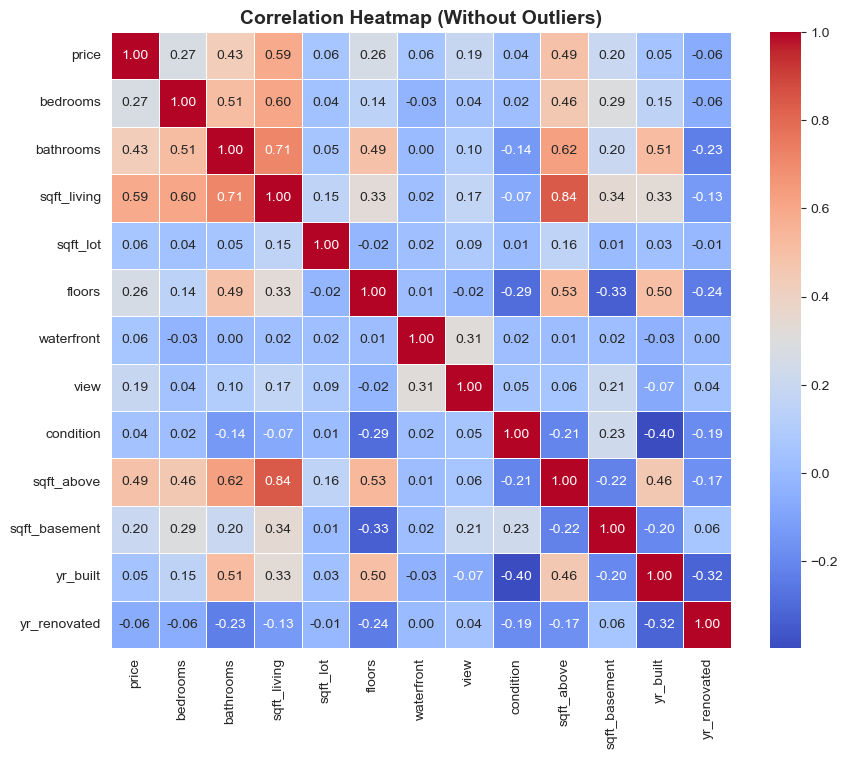

In [7]:
corr_matrix = df_filtered.select_dtypes(include = ['float64','int64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap (Without Outliers)", fontsize=14, fontweight='bold')

plt.savefig('Heatmap.png')
plt.show()

# Heatmap

## ปัจจัยที่มีผลต่อราคาบ้าน
* sqft_living บ้านที่มีพื้นที่ใช้สอยมากขึ้นมักมีราคาสูงขึ้น 0.59
* sqft_above บ้านที่มีพื้นที่ใช้สอยเหนือพื้นดินมากขึ้นมักมีราคาสูง 0.49
* bathrooms บ้านที่มีห้องน้ำมากขึ้นมักมีราคาสูงขึ้น 0.43
* bedrooms บ้านที่มีห้องนอนเยอะขึ้นมีแนวโน้มราคาสูงขึ้น 0.27
* floors บ้านที่มีหลายชั้นมักมีราคาสูงขึ้น 0.25
* view บ้านที่มีวิวดีมีแนวโน้มราคาสูงขึ้น 0.19

## ความสัมพันธ์ระหว่างตัวแปรอื่นๆ
* sqft_living & sqft_above บ้านที่มีพื้นที่ใช้สอยเยอะ มักมีพื้นที่บนดินเยอะ 0.84
* sqft_living & bathrooms บ้านที่มีพื้นที่ใช้สอยเยอะ มักมีห้องน้ำมากขึ้น 0.62
* sqft_living & bedrooms บ้านที่มีพื้นที่ใช้สอยเยอะ มักมีห้องนอนมากขึ้น 0.46
* bathrooms & sqft_above บ้านที่มีพื้นที่เหนือพื้นดินเยอะ มักมีห้องน้ำมากขึ้น 0.61
* floors & sqft_above บ้านที่มีหลายชั้น มักมีพื้นที่ใช้สอยเหนือพื้นดินเยอะ 0.53

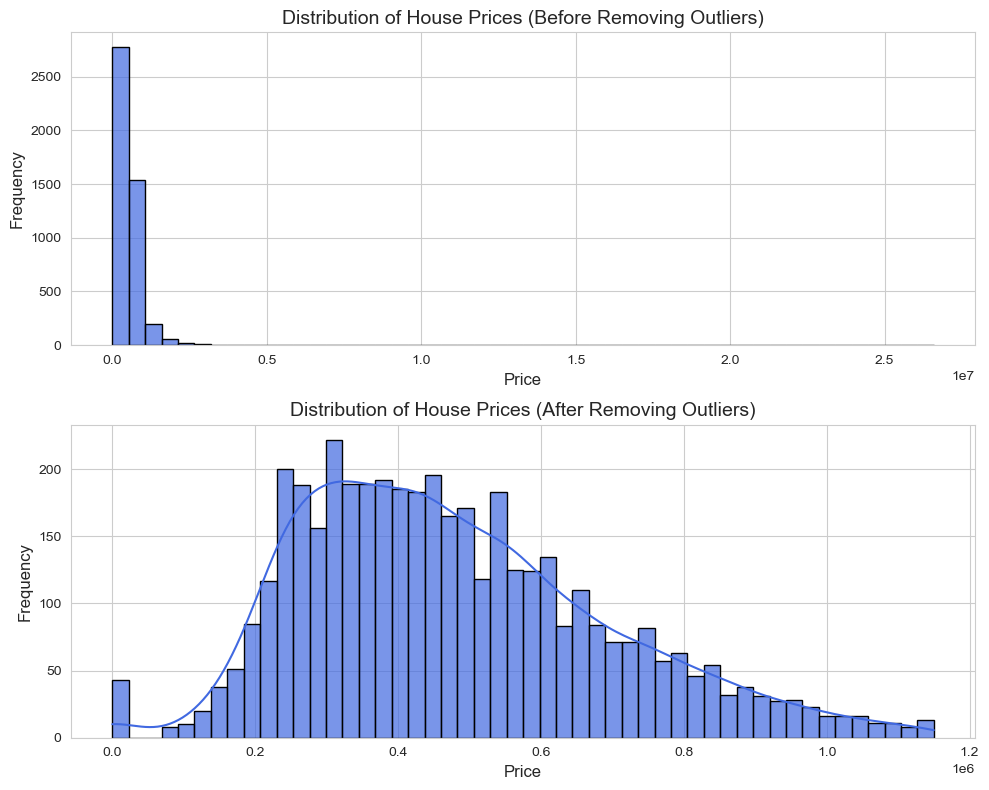

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.histplot(df['price'], bins=50, color="royalblue", edgecolor="black", alpha=0.7, ax=axes[0])
axes[0].set_xlabel('Price', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of House Prices (Before Removing Outliers)', fontsize=14)

sns.histplot(df_filtered['price'], bins=50, kde=True, color="royalblue", edgecolor="black", alpha=0.7, ax=axes[1])
axes[1].set_xlabel('Price', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of House Prices (After Removing Outliers)', fontsize=14)

plt.tight_layout()
plt.savefig('Price Distribution.png')
plt.show()

# Price Distribution
* มีบ้านบางหลังที่มีราคาสูงมากแต่เป็นส่วนน้อยของข้อมูล
* ราคาเฉลี่ยของบ้าน (หลังตัด Outliers) ส่วนใหญ่อยู่ระหว่าง 200,000 - 800,000

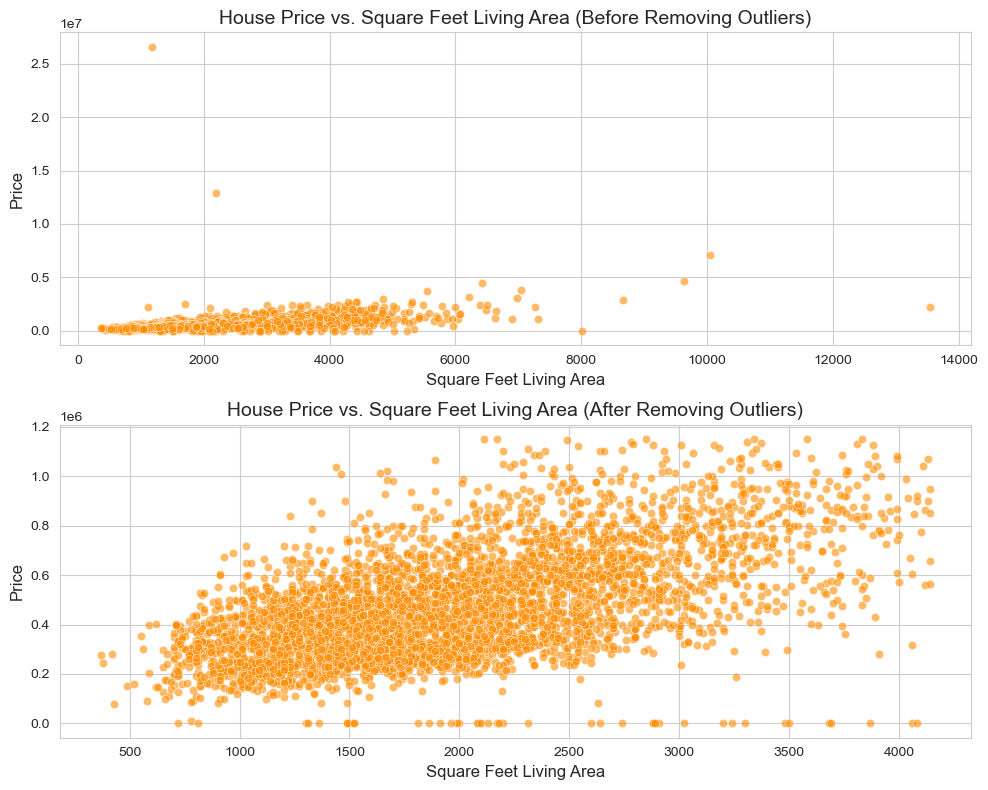

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.scatterplot(x=df['sqft_living'], y=df['price'], alpha=0.6, color="darkorange", ax=axes[0])
axes[0].set_xlabel('Square Feet Living Area', fontsize=12)
axes[0].set_ylabel('Price', fontsize=12)
axes[0].set_title('House Price vs. Square Feet Living Area (Before Removing Outliers)', fontsize=14)

sns.scatterplot(x=df_filtered['sqft_living'], y=df_filtered['price'], alpha=0.6, color="darkorange", ax=axes[1])
axes[1].set_xlabel('Square Feet Living Area', fontsize=12)
axes[1].set_ylabel('Price', fontsize=12)
axes[1].set_title('House Price vs. Square Feet Living Area (After Removing Outliers)', fontsize=14)

plt.tight_layout()
plt.savefig('House Price vs. Square Feet Living Area.png')
plt.show()

# ความสัมพันธ์ระหว่างขนาดบ้านกับราคา
* บ้านที่มีพื้นที่ใช้สอยมากขึ้นมักจะมีราคาสูงขึ้น
* จุดที่กระจุกตัวมากที่สุดอยู่ระหว่าง 1,000 - 3,000 และราคาส่วนใหญ่ต่ำกว่า 1 ล้าน
* บ้านขนาดใหญ่ที่มีพื้นที่มากกว่า 4,000 sqft มีราคากระโดดขึ้นอย่างมาก
* มีบางจุดที่มีพื้นที่บ้านใหญ่แต่ราคาต่ำ

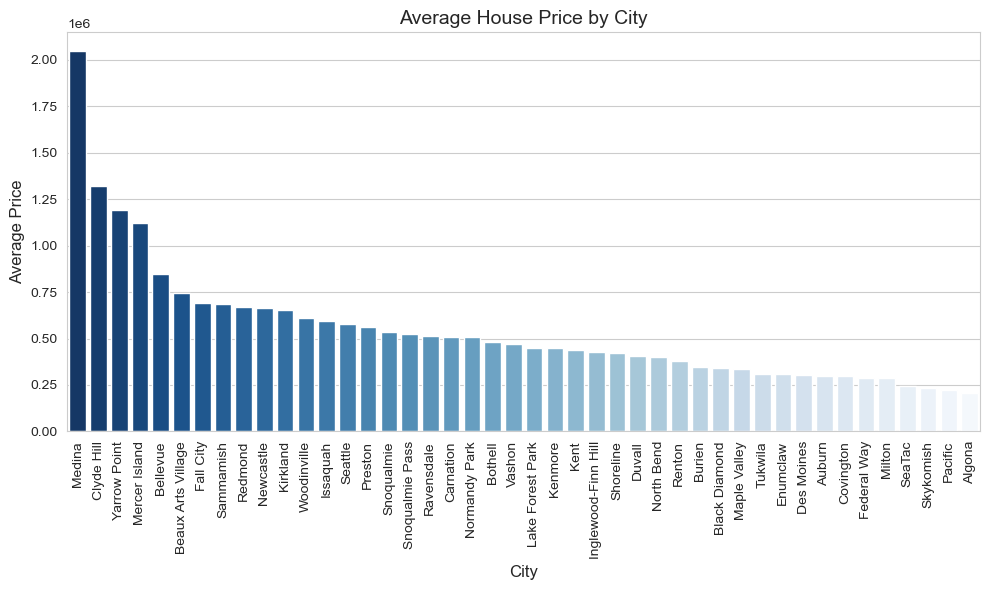

In [10]:
plt.figure(figsize=(10, 6))

avg_price_by_city = df.groupby('city')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_city.index, y=avg_price_by_city.values, hue=avg_price_by_city.index, palette="Blues_r", legend=False)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average House Price by City', fontsize=14)
plt.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Average House Price by City.png')
plt.show()

# การเปรียบเทียบราคาบ้านในแต่ละเมือง
*  เมืองที่ราคาสูงอาจเป็นเมืองที่มีเศรษฐกิจดี หรืออยู่ในทำเลที่ดี
*  เมืองที่ราคาต่ำอาจเป็นพื้นที่ชานเมือง หรือมีปัจจัยอื่น ๆ ที่ทำให้ราคาต่ำ

# Linear Regression

In [11]:
OHE = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
OHE_df = OHE.fit_transform(df[['city']])
df_encoded = pd.concat( [df,OHE_df] ,axis = 1).drop('city',axis = 1)

features = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()
features = [col for col in features if col != 'price']
target = 'price'

df_linear = df_encoded.dropna(subset=features)

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

df_linear = remove_outliers(df_linear, 'price')
df_linear = remove_outliers(df_linear, 'sqft_living')

X = df_linear[features]
y = df_linear[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=151)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
score = cross_val_score(model, X_train, y_train).mean()

print(f"MAE: {mae:.2f}")
print(f"Cross Validation Score (Mean): {score:.2f}")

MAE: 89068.44
Cross Validation Score (Mean): 0.61


In [12]:
for i in range(10):
    print(f"Actual price: {int(y_test.iloc[i])}, Predicted price: {int(y_pred[i])}")

Actual price: 725000, Predicted price: 735038
Actual price: 500000, Predicted price: 460230
Actual price: 481000, Predicted price: 393939
Actual price: 467000, Predicted price: 399465
Actual price: 485000, Predicted price: 498565
Actual price: 250000, Predicted price: 336046
Actual price: 430000, Predicted price: 493216
Actual price: 615000, Predicted price: 601100
Actual price: 472500, Predicted price: 472261
Actual price: 348580, Predicted price: 413224


# MAE	89,068 USD
# Cross Validation Score	0.61
# ทำนายราคากลาง-สูงได้ดี
# ทำนายราคาบ้านต่ำกว่า 300,000 USD ผิดพลาดมาก

# K-Means

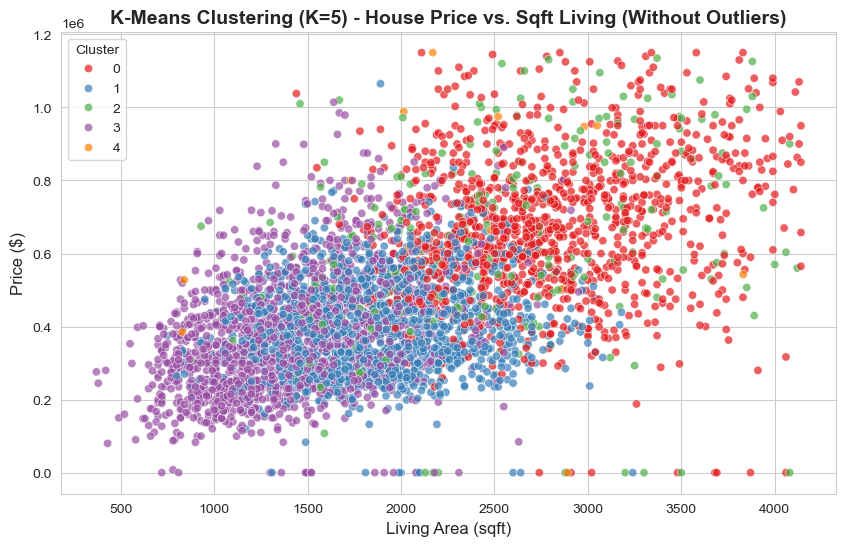

In [13]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront',
            'view', 'condition', 'yr_built']
df_cluster = df.dropna(subset=features)

df_cluster = remove_outliers(df_cluster, 'price')
df_cluster = remove_outliers(df_cluster, 'sqft_living')

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster[features])

kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cluster["sqft_living"], y=df_cluster["price"], hue=df_cluster["Cluster"], palette="Set1", alpha=0.7)
plt.xlabel("Living Area (sqft)", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.title("K-Means Clustering (K=5) - House Price vs. Sqft Living (Without Outliers)", fontsize=14, fontweight='bold')
plt.legend(title="Cluster")
plt.grid(True)
plt.savefig('K-Means.png')
plt.show()

In [14]:
cluster_summary = df_cluster.groupby('Cluster')[features].mean()
cluster_summary['count'] = df_cluster['Cluster'].value_counts()
cluster_summary

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,yr_built,count
Cluster,,,,,,,,,,
0,680201.480517,4.081250,2.643304,2812.340179,21736.490179,0.0,0.026786,3.471429,1978.665179,1120
1,394760.224583,3.244039,2.287693,1865.525947,9659.792426,0.0,0.004909,3.124825,1991.290323,1426
2,631608.075630,3.558824,2.398109,2520.126050,26564.487395,0.0,2.487395,3.558824,1964.273109,238
3,375326.838730,2.845687,1.391173,1404.531671,10069.657008,0.0,0.027628,3.724394,1945.539084,1484
4,681031.250000,2.937500,2.125000,2284.625000,27207.812500,1.0,3.437500,3.687500,1955.125000,16


In [15]:
df_cluster[(df['view']==3)&(df['waterfront']==1)]

C:\Users\witta\AppData\Local\Temp\ipykernel_16324\4212025996.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cluster[(df['view']==3)&(df['waterfront']==1)]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Cluster
535,2014-05-12 00:00:00,615000.0,2.0,1.75,2040,28593,1.5,1,3,4,2040,0,1919,1990,23014 Vashon Hwy SW,Vashon,WA 98070,USA,4
2608,2014-06-16 00:00:00,385000.0,2.0,1.00,830,26329,1.0,1,3,4,830,0,1928,0,7310 SW Maury Park Rd,Vashon,WA 98070,USA,4
3429,2014-06-26 00:00:00,663000.0,3.0,2.50,2480,37843,1.5,1,3,4,2480,0,1974,0,7030 SW Maury Park Rd,Vashon,WA 98070,USA,4


In [16]:
df_cluster[(df['price']>=1100000)&(df['view']==3)]

C:\Users\witta\AppData\Local\Temp\ipykernel_16324\3937156986.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cluster[(df['price']>=1100000)&(df['view']==3)]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Cluster
164,2014-05-06 00:00:00,1135000.0,4.0,2.75,3370,8103,1.0,0,3,3,1970,1400,1970,2014,3922 SW Henderson St,Seattle,WA 98136,USA,2
1845,2014-06-04 00:00:00,1126000.0,5.0,3.50,3880,13885,2.0,0,3,4,2540,1340,1979,0,13800 SE 43rd St,Bellevue,WA 98006,USA,2
2489,2014-06-13 00:00:00,1120000.0,5.0,1.50,2540,6660,2.0,0,3,4,2340,200,1954,1979,9827 47th Ave SW,Seattle,WA 98136,USA,2
4049,2014-07-08 00:00:00,1131000.0,3.0,2.25,2790,13791,1.0,0,3,3,2790,0,2006,0,18125 Brittany Dr SW,Normandy Park,WA 98166,USA,2


# Cluster 0 (🔴 สีแดง) - บ้านขนาดใหญ่และแพงที่สุด
* ราคาเฉลี่ยสูงสุด 680,480
* พื้นที่ใช้สอย 2,812 sqft
* มี 4 ห้องนอน และ 2-3 ห้องน้ำ
* ไม่มีบ้านติดริมน้ำ และวิว 1

# Cluster 1 (🔵 สีน้ำเงิน) - บ้านขนาดกลาง ราคาปานกลาง
* ราคาเฉลี่ย 394,760
* พื้นที่ใช้สอย 1,865 sqft
* มี 3-4 ห้องนอน และ 2 ห้องน้ำ
* ไม่มีบ้านติดริมน้ำ และวิว 1

# Cluster 2 (🟢 สีเขียว) - บ้านราคาสูงและมีวิวดี
* ราคาเฉลี่ย 631,608 USD
* พื้นที่ใช้สอย 2,520 sqft
* ห้องนอน 3-4 และห้องน้ำ 2
* ไม่มีบ้านติดริมน้ำ แต่ 2-3

# Cluster 3 (🟣 สีม่วง) - บ้านขนาดเล็ก ราคาถูกที่สุด
* ราคาเฉลี่ยต่ำสุด 375,326 USD
* พื้นที่ใช้สอย 1,404 sqft
* ห้องนอน 2-3 และห้องน้ำ 1-2
* ไม่มีบ้านติดริมน้ำ และวิว 1

# Cluster 4 (🟠 สีส้ม) - บ้านที่มีวิวและติดริมน้ำ
* ราคาเฉลี่ย 681,031 USD
* พื้นที่ใช้สอย 2,284 sqft
* ห้องนอน 2-3 และห้องน้ำ 2
* ติดริมน้ำ 100%
* วิวเฉลี่ย 3-4